In [ ]:
#!pip install dgl-cu111 -f https://data.dgl.ai/wheels/repo.html
!pip install transformers
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
#import dgl
import torch
import nltk

from collections import defaultdict
from sklearn.decomposition import PCA
from transformers import BertTokenizer
from sentence_transformers import SentenceTransformer

In [ ]:
text=pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/blogtext_2sent.csv')
tokenizer = BertTokenizer.from_pretrained("sentence-transformers/all-MiniLM-L12-v2")
sentTransformer = SentenceTransformer('all-MiniLM-L12-v2')     # all-MiniLM-L12-v2 # 384차원 # 256토큰
nltk.download('punkt')

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data_postEmb = np.load('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_Mono(1).npy',allow_pickle=True)

In [ ]:
datalen = [len(i) for i in data_postEmb]
idx = datalen < 129

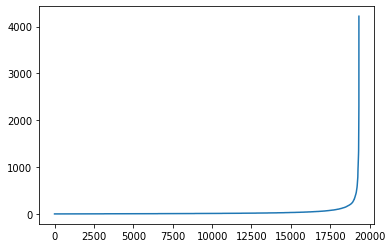

In [ ]:
plt.plot(range(19320),text['id'].value_counts().sort_values())

(array([13133.,     0., 27400.,     0.,     0., 41767.,     0.,     0.,
        72708.,     0.,     0., 80859.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 72889.,     0.,     0., 80071.,
            0.,     0., 67051.,     0.,     0., 55312.,     0.,     0.,
        46124.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 17584.,     0.,     0., 21347.,     0., 17462.,     0.,
            0., 14229.,     0.,     0.,  9317.,     0.,     0.,  7545.,
            0.,     0.,  5556.,     0.,     0.,  5016.,     0.,     0.,
         3738.,     0.,  2908.,     0.,     0.,  4230.,     0.,     0.,
         2044.,     0.,     0.,  4482.,     0.,     0.,  2733.,     0.,
            0.,  2207.,     0.,  3572.]),
 array([13.  , 13.35, 13.7 , 14.05, 14.4 , 14.75, 15.1 , 15.45, 15.8 ,
        16.15, 16.5 , 1

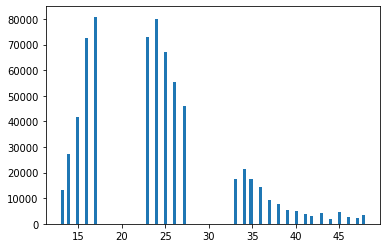

In [ ]:
plt.hist(text["age"],bins=100)

In [ ]:
[부터:전까지]

In [ ]:
data_postEmb=[]

for i, post in enumerate(text['text'][500000:]) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 

np.save('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_Mono(6).npy',data_postEmb)

0.0 : 0 584643
0.17104455197445279 : 1000 584643
0.34208910394890557 : 2000 584643
0.5131336559233584 : 3000 584643
0.6841782078978111 : 4000 584643
0.8552227598722639 : 5000 584643
1.0262673118467167 : 6000 584643
1.1973118638211695 : 7000 584643
1.3683564157956223 : 8000 584643
1.539400967770075 : 9000 584643
1.7104455197445279 : 10000 584643
1.8814900717189806 : 11000 584643
2.0525346236934334 : 12000 584643
2.2235791756678864 : 13000 584643
2.394623727642339 : 14000 584643
2.565668279616792 : 15000 584643
2.7367128315912446 : 16000 584643
2.9077573835656976 : 17000 584643
3.07880193554015 : 18000 584643
3.249846487514603 : 19000 584643
3.4208910394890557 : 20000 584643
3.5919355914635087 : 21000 584643
3.7629801434379613 : 22000 584643
3.9340246954124143 : 23000 584643
4.105069247386867 : 24000 584643
4.27611379936132 : 25000 584643
4.447158351335773 : 26000 584643
4.618202903310225 : 27000 584643
4.789247455284678 : 28000 584643
4.960292007259131 : 29000 584643
5.131336559233584 :

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [ ]:
np.save('/content/drive/MyDrive/BlogAuthorClass/data_postEmb_6000000to681284.npy',data_postEmb)
#data_postEmb = list(np.load('/content/drive/MyDrive/BlogAuthorClass/data_postEmb.npy',allow_pickle=True))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
text

,Unnamed: 0,Unnamed: 0.1,id,gender,age,topic,sign,date,text
0,0,2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
1,1,3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
2,2,4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
3,3,5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
4,4,6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
...,...,...,...,...,...,...,...,...,...
584638,69900,681279,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, I could write some really ..."
584639,69901,681280,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, 'I have the second yeast i..."
584640,69902,681281,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan, Your 'boyfriend' is fuckin..."
584641,69903,681282,1713845,male,23,Student,Taurus,"01,July,2004","Dear Susan: Just to clarify, I am as..."


In [ ]:
def concat2sent(sentList) :
    concatenated=[]
    start,end = 0,2
    for i in range(max((len(sentList)//2, 1))) :  
        twosents = sentList[start:end]
        start+=2 ;end+=2
        concatenated.append(''.join(twosents))
    return concatenated

def sentwise_embed(textToEmbed) :
    data_postEmb=[]
    for i, post in enumerate(textToEmbed) :
        post_sentwise = nltk.tokenize.sent_tokenize(post)
        post_sentwise = concat2sent(post_sentwise)
        data_postEmb.append(sentTransformer.encode(post_sentwise))
        if i%1000 == 0 : print(i*100/len(textToEmbed),":",i,str(len(textToEmbed)))
    return data_postEmb




data_postEmb = sentwise_embed(text['text'][:100000])
np.save('11/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(1).npy',data_postEmb)
del data_postEmb


data_postEmb = sentwise_embed(text['text'][100000:200000])
np.save('11/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(2).npy',data_postEmb)
del data_postEmb


data_postEmb = sentwise_embed(text['text'][200000:300000])
np.save('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(3).npy',data_postEmb)
del data_postEmb


data_postEmb = sentwise_embed(text['text'][300000:400000])
np.save('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(4).npy',data_postEmb)
del data_postEmb


data_postEmb = sentwise_embed(text['text'][400000:500000])
np.save('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(5).npy',data_postEmb)
del data_postEmb


data_postEmb = sentwise_embed(text['text'][500000:])
np.save('/content/drive/MyDrive/BlogAuthorClass/postEmb_384dim_2sent(6).npy',data_postEmb)

0.0 : 0 100000
1.0 : 1000 100000
2.0 : 2000 100000
3.0 : 3000 100000
4.0 : 4000 100000
5.0 : 5000 100000
6.0 : 6000 100000
7.0 : 7000 100000
8.0 : 8000 100000
9.0 : 9000 100000
10.0 : 10000 100000
11.0 : 11000 100000
12.0 : 12000 100000
13.0 : 13000 100000
14.0 : 14000 100000
15.0 : 15000 100000
16.0 : 16000 100000
17.0 : 17000 100000
18.0 : 18000 100000
19.0 : 19000 100000
20.0 : 20000 100000
21.0 : 21000 100000
22.0 : 22000 100000
23.0 : 23000 100000
24.0 : 24000 100000
25.0 : 25000 100000
26.0 : 26000 100000
27.0 : 27000 100000
28.0 : 28000 100000
29.0 : 29000 100000
30.0 : 30000 100000
31.0 : 31000 100000
32.0 : 32000 100000
33.0 : 33000 100000
34.0 : 34000 100000
35.0 : 35000 100000
36.0 : 36000 100000
37.0 : 37000 100000
38.0 : 38000 100000
39.0 : 39000 100000
40.0 : 40000 100000
41.0 : 41000 100000
42.0 : 42000 100000
43.0 : 43000 100000
44.0 : 44000 100000
45.0 : 45000 100000
46.0 : 46000 100000
47.0 : 47000 100000
48.0 : 48000 100000
49.0 : 49000 100000
50.0 : 50000 100000
51.

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


0.0 : 0 100000
1.0 : 1000 100000
2.0 : 2000 100000
3.0 : 3000 100000
4.0 : 4000 100000
5.0 : 5000 100000
6.0 : 6000 100000
7.0 : 7000 100000
8.0 : 8000 100000
9.0 : 9000 100000
10.0 : 10000 100000
11.0 : 11000 100000
12.0 : 12000 100000
13.0 : 13000 100000
14.0 : 14000 100000
15.0 : 15000 100000
16.0 : 16000 100000
17.0 : 17000 100000
18.0 : 18000 100000
19.0 : 19000 100000
20.0 : 20000 100000
21.0 : 21000 100000
22.0 : 22000 100000
23.0 : 23000 100000
24.0 : 24000 100000
25.0 : 25000 100000
26.0 : 26000 100000
27.0 : 27000 100000
28.0 : 28000 100000
29.0 : 29000 100000
30.0 : 30000 100000
31.0 : 31000 100000
32.0 : 32000 100000
33.0 : 33000 100000
34.0 : 34000 100000
35.0 : 35000 100000
36.0 : 36000 100000
37.0 : 37000 100000
38.0 : 38000 100000
39.0 : 39000 100000
40.0 : 40000 100000
41.0 : 41000 100000
42.0 : 42000 100000
43.0 : 43000 100000
44.0 : 44000 100000
45.0 : 45000 100000
46.0 : 46000 100000
47.0 : 47000 100000
48.0 : 48000 100000
49.0 : 49000 100000
50.0 : 50000 100000
51.

In [ ]:
sentLength = [len(i) for i in list(np.load('/content/drive/MyDrive/BlogAuthorClass/data_postEmb_0to100000.npy',allow_pickle=True))]

In [ ]:
pca = PCA(n_components=6)
data4pca = np.vstack(tuple(data_postEmb[i] for i in range(len(data_postEmb))))
pca.fit(data4pca)

In [ ]:
num_of_sentence = [len(i) for i in data_postEmb]
text['sent_count'] = pd.Series(num_of_sentence)

In [ ]:
sum(np.array(sentLength)==1)

13346

In [ ]:
data_postEmb = list(np.load('/content/drive/MyDrive/BlogAuthorClass/data_postEmb_1000000to200000.npy',allow_pickle=True))

In [ ]:
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/blogtext_2sent.csv')[:400000][['id','gender','age','topic','text']]

In [ ]:
def id_sampling(text, n) :
    ids = text['id'].value_counts()[:n]   # 글을 많이 작성한 n명
    sampled = [text[text['id']==i] for i in ids.index]
    return pd.concat(sampled)

In [ ]:
#5, #10, 25, 50, 75, 100
id_sampling(text,10).to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(10ids).csv')
id_sampling(text,25).to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(25ids).csv')
id_sampling(text,50).to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(50ids).csv')
id_sampling(text,75).to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(75ids).csv')
id_sampling(text,100).to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(100ids).csv')

In [ ]:
data_postEmb=[]
for i, post in enumerate(pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(10ids).csv')['text']) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_10samples.npy',data_postEmb)
del data_postEmb

data_postEmb=[]
for i, post in enumerate(pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(25ids).csv')['text']) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_25samples.npy',data_postEmb)
del data_postEmb

data_postEmb=[]
for i, post in enumerate(pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(50ids).csv')['text']) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_50samples.npy',data_postEmb)
del data_postEmb

data_postEmb=[]
for i, post in enumerate(pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(75ids).csv')['text']) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_75samples.npy',data_postEmb)
del data_postEmb

data_postEmb=[]
for i, post in enumerate(pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(100ids).csv')['text']) :
    post_sentwise = nltk.tokenize.sent_tokenize(post)
    data_postEmb.append(sentTransformer.encode(post_sentwise))
    if i%1000 == 0 : print(i*100/len(text),":",i,str(len(text))) 
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_100samples.npy',data_postEmb)
del data_postEmb

0.0 : 0 400000
0.25 : 1000 400000
0.5 : 2000 400000
0.75 : 3000 400000
1.0 : 4000 400000
1.25 : 5000 400000
1.5 : 6000 400000
1.75 : 7000 400000
2.0 : 8000 400000
2.25 : 9000 400000
2.5 : 10000 400000
2.75 : 11000 400000
3.0 : 12000 400000
3.25 : 13000 400000
3.5 : 14000 400000
3.75 : 15000 400000
4.0 : 16000 400000
4.25 : 17000 400000


/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


0.0 : 0 400000
0.25 : 1000 400000
0.5 : 2000 400000
0.75 : 3000 400000
1.0 : 4000 400000
1.25 : 5000 400000
1.5 : 6000 400000
1.75 : 7000 400000
2.0 : 8000 400000
2.25 : 9000 400000
2.5 : 10000 400000
2.75 : 11000 400000
3.0 : 12000 400000
3.25 : 13000 400000
3.5 : 14000 400000
3.75 : 15000 400000
4.0 : 16000 400000
4.25 : 17000 400000
4.5 : 18000 400000
4.75 : 19000 400000
5.0 : 20000 400000
5.25 : 21000 400000
5.5 : 22000 400000
5.75 : 23000 400000
6.0 : 24000 400000
6.25 : 25000 400000
6.5 : 26000 400000
6.75 : 27000 400000
7.0 : 28000 400000
7.25 : 29000 400000
7.5 : 30000 400000
7.75 : 31000 400000
8.0 : 32000 400000
8.25 : 33000 400000
0.0 : 0 400000
0.25 : 1000 400000
0.5 : 2000 400000
0.75 : 3000 400000
1.0 : 4000 400000
1.25 : 5000 400000
1.5 : 6000 400000
1.75 : 7000 400000
2.0 : 8000 400000
2.25 : 9000 400000
2.5 : 10000 400000
2.75 : 11000 400000
3.0 : 12000 400000
3.25 : 13000 400000
3.5 : 14000 400000
3.75 : 15000 400000
4.0 : 16000 400000
4.25 : 17000 400000
4.5 : 18000 

In [ ]:
from sklearn.model_selection import train_test_split

# 10
data = np.load('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_10samples.npy', allow_pickle=True)
target = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(10ids).csv')
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=target['id'],
                                                      random_state=23)

np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_10samples(train).npy',x_train)
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_10samples(test).npy',x_test)
y_train.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(10ids).csv')
y_test.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_test_sample(10ids).csv')
del data, target, x_train, x_test, y_train, y_test

#25
data = np.load('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_25samples.npy', allow_pickle=True)
target = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(25ids).csv')
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=target['id'],
                                                      random_state=23)

np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_25samples(train).npy',x_train)
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_25samples(test).npy',x_test)
y_train.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(25ids).csv')
y_test.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_test_sample(25ids).csv')

del data, target, x_train, x_test, y_train, y_test

#50
data = np.load('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_50samples.npy', allow_pickle=True)
target = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(50ids).csv')
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=target['id'],
                                                      random_state=23)

np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_50samples(train).npy',x_train)
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_50samples(test).npy',x_test)
y_train.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(50ids).csv')
y_test.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_test_sample(50ids).csv')

del data, target, x_train, x_test, y_train, y_test

#75
data = np.load('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_75samples.npy', allow_pickle=True)
target = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(75ids).csv')
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=target['id'],
                                                      random_state=23)

np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_75samples(train).npy',x_train)
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_75samples(test).npy',x_test)
y_train.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(75ids).csv')
y_test.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_test_sample(75ids).csv')

del data, target, x_train, x_test, y_train, y_test

#100
data = np.load('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_100samples.npy', allow_pickle=True)
target = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(100ids).csv')
x_train, x_test, y_train, y_test = train_test_split(data, target,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=target['id'],
                                                      random_state=23)

np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_100samples(train).npy',x_train)
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/postEmb_384dim_100samples(test).npy',x_test)
y_train.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_train_sample(100ids).csv')
y_test.to_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID(2)/blogtext_test_sample(100ids).csv')

del data, target, x_train, x_test, y_train, y_test

In [ ]:
!git clone https://github.com/yunitata/coling2018

Cloning into 'coling2018'...
remote: Enumerating objects: 52, done.
remote: Total 52 (delta 0), reused 0 (delta 0), pack-reused 52
Unpacking objects: 100% (52/52), done.


In [ ]:
import drive.MyDrive.coling2018
import drive.MyDrive.coling2018.feature_extractor as feat_extractor

def count_letter_freq(text_doc):  # per document (vector with length 26)
    text_doc = ''.join([i for i in text_doc if i.isalpha()])
    letter = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's'
              , 't', 'u', 'v', 'w', 'x', 'y', 'z']
    count = {}
    for s in text_doc:
      if s in count:
        count[s] += 1
      else:
        count[s] = 1
    count_list = {}
    for d in letter:
        if d in count.keys():
            count_list[d] = count[d]
        else:
            count_list[d] = 0
    return np.array(list(count_list.values()))/len(text_doc)    ### TypeError: unsupported operand type(s) for /: 'dict_values' and 'int'
# Lexical feature (digit frequency)


def count_digit_freq(text_doc):   # per document (vector with length 10)
    text_doc = ''.join([i for i in text_doc if i.isdigit()])
    digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    count = {}
    for s in text_doc:
      if s in count :
        count[s] += 1
      else:
        count[s] = 1
    count_list = {}
    for d in digits:
        if d in count.keys():
            count_list[d] = count[d]
        else:
            count_list[d] = 0
    return np.array(list(count_list.values()))/len(text_doc)

def freq_function_word(text):  # per document (vector with length 174)
    words = text.decode('utf-8').split(" ")
    fn = '/content/drive/MyDrive/coling2018/stopwords.txt'
    with open(fn) as f:
        function_word = f.readlines()
    for i in range(len(function_word)):
        function_word[i] = function_word[i].strip('\n')
    count = {}
    for s in words:
      if s in count :
        count[s] += 1
      else:
        count[s] = 1
    count_list = {}
    for d in function_word:
        if d in count.keys():
            count_list[d] = count[d]
        else:
            count_list[d] = 0
    vec = np.array(list(count_list.values()))
    return vec/len(words)

def punctuation_freq(text):
    punct = ['\'', ':', ',', '_', '!', '?', ';', ".", '\"', '(', ')', '-']
    count = {}
    for s in text:
      if s in count :
        count[s] += 1
      else:
        count[s] = 1
    count_list = {}
    for d in punct:
        if d in count.keys():
            count_list[d] = count[d]
        else:
            count_list[d] = 0
    return np.array(list(count_list.values()))/len(text)


def stylometric_feature(text_x):
    stylometry_vector_all = []
    for x in text_x:
        stylometry_vector = []
        stylometry_vector.append(feat_extractor.average_word_length(x.encode('utf-8')))
        stylometry_vector.append(feat_extractor.total_short_words(x.encode('utf-8')))
        stylometry_vector.append(feat_extractor.total_digit(x))
        stylometry_vector.append(feat_extractor.total_uppercase(x))
        stylometry_vector.extend(count_letter_freq(x))
        stylometry_vector.extend(count_digit_freq(x))
        stylometry_vector.append(feat_extractor.hapax_legomena_ratio(x.encode('utf-8')))
        stylometry_vector.append(feat_extractor.dislegomena_ratio(x.encode('utf-8')))
        stylometry_vector.extend(freq_function_word(x.encode('utf-8')))
        stylometry_vector.extend(punctuation_freq(x))
        stylometry_vector_all.append(stylometry_vector)
    return np.array(stylometry_vector_all)

In [ ]:
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(10ids).csv')
text['text']

0               Heya Rosie. Yar, sorry I didn't call, I...
1               Heh, I confer, actually. It'll never go...
2               I also love how right now I'd normally ...
3               Yah Gunter really pushed the buttons th...
4                           Some Philippian posts...  J...
                               ...                        
10546               Ok so been wondering whats better w...
10547               the first time together, so simple ...
10548               Hey guys,  Its all over, the summer...
10549                urlLink Anime News Network - Revie...
10550                     hey so the rep from lucky mag...
Name: text, Length: 10551, dtype: object

In [ ]:
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(10ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_10ids(train).npy',
        stylometric_feature(text['text']))
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_test_sample(10ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_10ids(test).npy',
        stylometric_feature(text['text']))

text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(25ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_25ids(train).npy',
        stylometric_feature(text['text']))
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_test_sample(25ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_25ids(test).npy',
        stylometric_feature(text['text']))

text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(50ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_50ids(train).npy',
        stylometric_feature(text['text']))
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_test_sample(50ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_50ids(test).npy',
        stylometric_feature(text['text']))

text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(75ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_75ids(train).npy',
        stylometric_feature(text['text']))
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_test_sample(75ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_75ids(test).npy',
        stylometric_feature(text['text']))

text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_train_sample(100ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_100ids(train).npy',
        stylometric_feature(text['text']))
text = pd.read_csv('/content/drive/MyDrive/BlogAuthorClass/SampledID/blogtext_test_sample(100ids).csv')
np.save('/content/drive/MyDrive/BlogAuthorClass/SampledID/StyloFeatures/stylometric_features_100ids(test).npy',
        stylometric_feature(text['text']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
stylo_feats.shape

(10551, 481)